# Intro to Pricing of Vanilla Interest Rate Swap

---

## Intro: Vanilla IRS

The price of a vanilla (fixed-for-floating) IRS is simply given by
$$
V^{\text{swap}}(t) = \phi \, (PV_{\text{float}} - PV_{\text{fixed}})
$$
where
$$
\phi = 
\begin{cases}
    1, & \text{for payer IRS} \\
    -1, & \text{for receiver IRS}.
\end{cases}
$$
Even though there is almost no IBOR swaps actively trading in the market anymore, most swap pricing literature focuses on Libor swaps. This is simply because most interest rate modelling literature were written pre-LIBOR transition. 

Here, we start by reviewing the pricing of a simple vanilla IBOR swap under the single curve framework. From that, we introduce the key quanitities for the risk management of vanilla IRS, e.g. swap rates and annuity. Then we extend to the discussion on IBOR & risk-free rate (RFR) swap pricing in the multi-curve setting. We will see that, IBOR & RFR swaps actually work very similarly, despite RFR having a completely different compounding and fixing mechanism. 

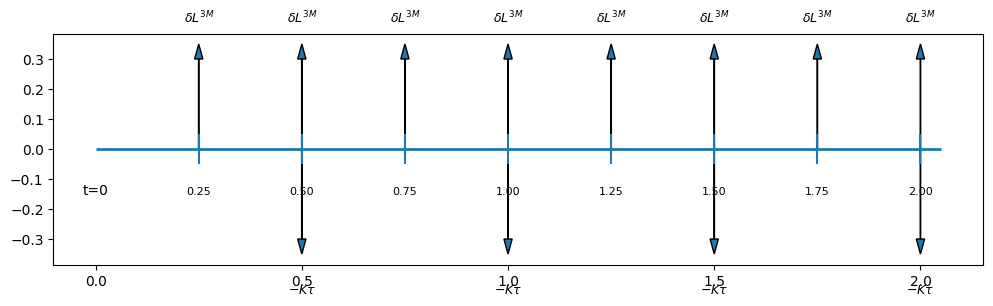

In [2]:
import matplotlib.pyplot as plt

# Payment dates
float_dates = [0.25 * i for i in range(1, 9)]   # Quarterly (3M)
fixed_dates = [0.5 * i for i in range(1, 5)]    # Semi-annual

fig, ax = plt.subplots(figsize=(12, 3))

# Timeline
ax.hlines(0, 0, 2.05, linewidth=2)
ax.text(0, -0.15, "t=0", ha='center')

# Floating leg cashflows (above timeline)
for t in float_dates:
    ax.arrow(t, 0, 0, 0.35, head_width=0.02, head_length=0.05, length_includes_head=True)
    ax.text(t, 0.42, r"$\delta L^{3M}$", ha='center', fontsize=9)

# Fixed leg cashflows (below timeline)
for t in fixed_dates:
    ax.arrow(t, 0, 0, -0.35, head_width=0.02, head_length=0.05, length_includes_head=True)
    ax.text(t, -0.48, r"$-K\tau$", ha='center', fontsize=9)

# Mark dates
for t in sorted(set(float_dates + fixed_dates)):
    ax.vlines(t, -0.05, 0.05)
    ax.text(t, -0.15, f"{t:.2f}", ha='center', fontsize=8)


## IBOR swap pricing

Let's consider a simple (potentially forward starting) vanilla IBOR payer IRS with unit notional ($N=1)$. Its PV is given as
$$
V^{\text{swap}}(t) = 
\sum_{j=1}^{m} \mathbb{E}^{\mathbb{Q}}_t[L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j-1} + \delta) \tilde{\tau}_j D(t, \tilde{T}_{j}) ]
- \sum_{i=1}^{n} K \tau_i P(t,T_i)
$$
where:
- $m$ and $n$ denote the number of cash flows for the floating and fixed legs respectively,
- $\tilde{T}_j$ (and $T_i$) denote the $j$-th (and $i$-th) cash flow payment date for the floating (and fixed) leg,
- $\tilde{\tau}_j$ (and $\tau_i$) denote the accrual fraction for the $j$-th (and $i$-th) accrual period,
- $D(t,T) := M_t/M_T$ is the stochastic discount factor from time $t$ to $T$,
- $M_t := \exp(\int_0^t r_s ds)$ is the (stochastic) money market account,
- $r_s$ is the short rate,
- $P(t,T) = \mathbb{E}^{\mathbb{Q}}_t[D(t,T)]$ is the discount factor (ZCB price) from time $t$ to $T$,
- $K$ is the fixed rate, and
- $L^{\delta}(T, T + \delta)$ is the $\delta$-IBOR rate with an accrual period $[T,T+\delta]$, e.g. $L^{\text{3M}}(t_0,t_0+3/12)$ denotes the spot 3M (3 month) IBOR rate.

For simplicity, we assume:
- $T_n = \tilde{T}_m$, i.e. the final cash flow of the two legs coincides, and
- $\tilde{\tau}_j = \delta$ for all $j$, i.e. the accrual fractions are constant and match perfectly with the IBOR tenor. This also implies that $\tilde{T}_{j-1} + \delta = \tilde{T}_{j}$ for all $j$.
See above plot for a simple stylised example.

We will work under the classical (pre-2008) single curve framework, i.e. the index curve and discount curves are the same. Since IBOR rates are simply compounded rate, we have
$$
L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j-1} + \delta) 
= \frac{1}{\delta} \left( \frac{1}{P(\tilde{T}_{j-1}, \tilde{T}_{j})} -1 \right).
$$

The floating leg PV depends on $L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j})$, which is a stochastic quantity. However, we will demonstrate that is possible to express the PV of the future floating coupon payments using today's ($\mathcal{F}_t$-measurable) quantities. Note that to compute the PV of each coupon payment,
$$
\mathbb{E}^{\mathbb{Q}}_t[L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j}) \, \delta \, D(t, \tilde{T}_{j}) ],
$$
the expectation is taken over the risk-neutral (money market) measure with numeraire $M_{t} := \exp( \int_0^t r_s ds)$. Changing to the $\tilde{T}_{j}$-forward measure (i.e. with $P(t,\tilde{T}_{j})$ as the numeraire), we have
$$
\begin{aligned}
P(t,\tilde{T}_{j}) \,
\mathbb{E}^{\mathbb{Q}^{\tilde{T}_{j}}}_t[\delta \, L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j}) ] 
&= P(t,\tilde{T}_{j}) \, \delta \,
\mathbb{E}^{\mathbb{Q}^{\tilde{T}_{j}}}_t[ L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j}) ] \\
&= P(t,\tilde{T}_{j}) \, \delta \,
\mathbb{E}^{\mathbb{Q}^{\tilde{T}_{j}}}_t[ F^{\delta}(\tilde{T}_{j-1}; \tilde{T}_{j-1}, \tilde{T}_{j}) ],
\end{aligned}
$$
where $F^{\delta}(t; T_{i-1}, T_i)$ is the prevailing forward $\delta$-IBOR rate with an accrual period $[T_{i-1}, T_i]$, and that we have used the standard change-of-numeraire identity
$$
\mathbb{E}^{\mathbb{Q}}_t \left[ X \frac{M_t}{M_T} \right]
= P(t,T) \, \mathbb{E}^{\mathbb{Q}^{T}}_t \big[ X \big].
$$
Finally, applying the martingale property of the forward IBOR rate under the forward measure (only works when we are in the single curve setting), 
$$
\mathbb{E}^{\mathbb{Q}^{\tilde{T}_{j}}}_t[ F^{\delta}(\tilde{T}_{j-1}; \tilde{T}_{j-1}, \tilde{T}_{j}) ]
= F^{\delta}(t; \tilde{T}_{j-1}, \tilde{T}_{j}),
$$
we showed that the PV for the floating leg can be computed using the prevailing forward IBOR curve, 
$$
\sum_{j=1}^{m} \mathbb{E}^{\mathbb{Q}}_t[L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j}) \, \delta \, D(t, \tilde{T}_{j}) ]
= \sum_{j=1}^{m} F^{\delta}(t; \tilde{T}_{j-1}, \tilde{T}_{j}) \, \delta \, P(t, \tilde{T}_{j}),
$$
i.e. IBOR swap pricing is model-free under the single-curve framework (no stochastic model for IBOR dynamics is required). 

Strictly speaking, under the dual/multi-curve setting (if the discount curve and index curve are different) the above equality breaks down. We will need a stochastic model to compute a convexity/basis adjustment to account for the fact that the IBOR forward rate is not a martingale under the discount bond $\tilde{T}_j$-forward measure ($\mathbb{Q}^{d, \tilde{T}_{j}}$),
$$
\mathbb{E}^{\mathbb{Q}^{d, \tilde{T}_{j}}}_t[ F^{\delta}(\tilde{T}_{j-1}; \tilde{T}_{j-1}, \tilde{T}_{j}) ] 
= F^{\delta}(t; \tilde{T}_{j-1}, \tilde{T}_{j})
+ \text{adjustment}_j,
$$
Equivalently, we can see that:
$$
\mathbb{E}^{\mathbb{Q}}_t[L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j-1} + \delta) D(t, \tilde{T}_{j}) ] = 
\mathbb{E}^{\mathbb{Q}^{d, \tilde{T}_{j}}}_t[L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j})]
P(t, \tilde{T}_{j})
+ \text{CA}_j,
$$
where $\text{CA}_j = \text{Cov}^{\mathbb{Q}}[ L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j}), D(t, \tilde{T}_{j}) ]$ is the convexity adjustment, and we have used the fact that $P(t, \tilde{T}_{j}) = \mathbb{E}^{\mathbb{Q}}_t[D(t, \tilde{T}_{j})]$.

However, in the next section, we will show that the bootstrapping of the index curve (in multicurve setting) accounts for such convexity adjustment by redefining what the forward curve means. So by construction, no explicity stochastic model is required for the pricing of vanilla IRSs, even in the multi-curve setting. I.e. this statement still holds true in multi-curve world,
$$
\sum_{j=1}^{m} \mathbb{E}^{\mathbb{Q}}_t[L^{\delta}(\tilde{T}_{j-1}, \tilde{T}_{j}) \, \delta \, D^{d}(t, \tilde{T}_{j}) ]
= \sum_{j=1}^{m} F^{\delta}(t; \tilde{T}_{j-1}, \tilde{T}_{j}) \, \delta \, P^{d}(t, \tilde{T}_{j}).
$$

The fact we are working under the single-curve setting allows for further simplification of the PV for the floating leg. Recall that in the single-curve world, the forward IBOR rate is given as 
$$
F^{\delta}(t; T, T + \delta)
:= \frac{1}{\delta} \left( \frac{P(t,T)}{P(t,T + \delta)} -1 \right).
$$
Substituting the forward IBOR rate into the expression for the floating leg PV yields
$$
\begin{aligned}
PV_{\text{float}}
&= \sum_{j=1}^{m} \frac{1}{\delta} \left( \frac{P(t,\tilde{T}_{j-1})}{P(t,\tilde{T}_{j})} -1 \right) \times \delta \, P(t, \tilde{T}_{j}) \\
&= P(t,\tilde{T}_0) - P(t,\tilde{T}_m).
\end{aligned}
$$

## Swap rate and Annuity

At inception ($t_0$), all linear products (products with no optionality) must have a PV of zero. For our vanilla IRS with notional $N$, this implies that
$$
\frac{PV_{\text{float}}(t_0)}{N} = K \, \underbrace{\sum_{i=1}^{n} \tau_i P(t_0,T_i)}_{A(t_0;T_0,T_n)},
$$
where $A(t;T_0,T_n)$ denotes the swap annuity, and that $T_n-T_0 = \tilde{T}_m - \tilde{T}_0$ is the swap tenor (length of the swap). Rearranging for $K$, we get the fixed rate required to price the swap at par. This quantity is known as the swap rate $S(t;T_0,T_n)$,
$$
S(t_0;T_0,T_n) = 
\frac{PV_{\text{float}}(t_0)/N}{A(t_0;T_0,T_n)}.
$$
Although this equality was (is often) derived by setting the initial swap value to zero, it in fact holds at all times by construction, because it is the definition of the par swap rate prevailing at time $t$, 
$$
S(t;T_0,T_n) := 
\frac{PV_{\text{float}}(t)/N}{A(t;T_0,T_n)}, \qquad \text{for all }t \in [t_0,T_0].
$$
Swap rates are readily quoted in the market. It represents the fair fixed rate of a given swap defined by the $(T_0, T_n-T_0)$-pair. 

Using a given swap rate, we can easily compute the price (MtM) of the corresponding swap at any time $t_0 \leq t \leq T_0$,
$$
\begin{align}
V^{\text{swap}}(t) &=
N \phi \, \big(S(t;T_0,T_n) A(t;T_0,T_n) - K A(t;T_0,T_n) \big) \\
&= N \phi \, A(t;T_0,T_n) \big(S(t;T_0,T_n)) - K \big).
\end{align}
$$
We can see that the price of a swap is linear in swap rate, which is the reason why swaps are considered linear products - a swap is simply a forward contract on the swap rate, with annuity as the numeraire. Analogous to how the (equity) forward price $F^{S}(t;T)$ is a martingale under the $T$-forward measure, 
$$
\mathbb{E}^{\mathbb{Q}^T}_t[S_T] = F^{S}(t;T),
$$
the swap rate is a martingale under its corresponding annuity measure. We can demonstrate this easily. Recall $A(t;T_0,T_n)$ is by definition a portfolio of zero coupon bonds, thus it must be a tradable asset. It is also strictly positive, therefore it qualifies as a numeraire. The Fundamental Theorem of Asset Pricing (FTAP) then implies that $V^{\text{swap}}(t)/A(t;T_0,T_n)$ must be a martingale under the annuity measure $\mathbb{Q}^{A(T_0,T_n)}$ (where $A(t;T_0,T_n)$ the numeraire). Since
$$
\frac{V^{\text{swap}}(t)}{A(t;T_0,T_n)}
= N \phi \, \big(S(t;T_0,T_n)) - K \big),
$$
and that $S(t;T_0,T_n)$ is the only stochastic quantity here, we proved that $S(t;T_0,T_n)$ must be a $\mathbb{Q}^{A(T_0,T_n)}$-martingale,
$$
\mathbb{E}^{\mathbb{Q}^A(T_0,T_n)}_t[S(u;T_0,T_n)] = S(t;T_0,T_n),
\qquad \text{for } t \leq u \leq T_0.
$$
Alternatively, one can also start by defining the swap rate as an appropriate $\mathbb{Q}^{A(T_0,T_n)}$-martingale, then derive the swap pricing formula from it.

Given its intimate relation with swap rate, it is no surprise that the annuity is a key quantity in the risk management of swaps (we will see that it is also a key quantity in the pricing of swaptions). Specifically, the annuity is effectively the swap's PV01 (per unit notional):
$$
\begin{align}
PV01 &:= \frac{\partial PV^{\text{swap}}}{\partial K} \times 1\text{b.p.}\\
&= - N \phi \, A(t;T_0,T_n) \times 1\text{b.p.}
\end{align}
$$
This shows that the annuity represents the swap price per unit fixed rate (PV01) per unit notional, i.e.
$$
A(t;T_0,T_n) = -\frac{\phi}{N} \frac{\partial PV^{\text{swap}}}{\partial K}.
$$
Now, we see that the swap price is simply its PV01 times moneyness:
$$
V^{\text{swap}}(t) =
\underbrace{N A(t;T_0,T_n)}_{-\phi \times PV01} 
\underbrace{\, \phi \big(S(t;T_0,T_n) - K \big)}_{\text{moneyness}}.
$$

Finally, to familiarise ourselves with the proper swap terminologies/notations, let's consider a simple example. Suppose we have a 2-year into 5-year forward starting swap, i.e. a swap that commences in two years’ time and has a tenor of five years. Traders would typically refer this as a 2-by-5 swap, or eqivalently a 2-into-5 swap. Mathematically, we denote its swap rate as $S(t_0;t_0 + 2Y , t_0 + 2Y +5Y)$.

## IBOR IRS under multi-curve

Pre-2008, the market operated under the implicit assumption that a single yield curve could be used both to:
- project IBOR forward rates, and
- discount future cashflows.

This assumption relied on the idea that interbank lending was effectively risk-free at short maturities. The financial crisis fundamentally broke this assumption. Post-2008, different sources of risk became observable and tradeable, and it was discovered that
- IBOR rates embed banks' credit risk, liquidity risk, and term funding risk, and that
- the correct (by no arbitrage principle) discounting rate for valuing derivatives should be the funding rate, e.g.
     * **uncollateralised positions:** discount at own funding rate - for a bank, this is typically defined by treasury;
     * **fully collateralised positions:** discount at CSA/collateral rate - which is typically the native overnight rates (OIS-discounting),
     * **partially collateralised positions:** funding valuation adjustment (FVA) is needed to account for non-trivial discounting switching.

As a result, the market enforces a multi-curve framework consisting of:
- a discounting curve $P^{d}(t,T)$ (typically native OIS), and
- one forward (index) curve $P^{\delta}(t,T)$ for each IBOR tenor $\delta$.

Mathematically, this breaks the identity
$$
L^{\delta}(T,T+\delta)
= \frac{1}{\delta}\left(\frac{1}{P(T,T+\delta)}-1\right),
$$
which only holds when projection and discounting are governed by the same numeraire.

Under a multi-curve framework, the floating leg PV of a vanilla IRS is written as
$$
PV_{\text{float}}(t) =
\sum_{j=1}^{m}
\mathbb{E}^{\mathbb{Q}^{d}}_t
\!\left[
L^{\delta}(\tilde{T}_{j-1},\tilde{T}_j)
\,\delta\, D^{d}(t,\tilde{T}_j)
\right].
$$

Since the IBOR forward rate is projected using a different curve from the discounting curve, $L^{\delta}$ is no longer a martingale under the discounting forward measure. As described above, one might therefore expect the presence of a convexity adjustment. However, for vanilla IRSs, no explicit convexity adjustment is required. The key reason is definitional, rather than dynamical.

In a multi-curve framework, the forward IBOR rate is **defined** such that
$$
\boxed{
\mathbb{E}^{\mathbb{Q}^{d}}_t
\!\left[
L^{\delta}(\tilde{T}_{j-1},\tilde{T}_j)
\,\delta\, D^{d}(t,\tilde{T}_j)
\right]
:=
\delta\, F^{\delta}(t;\tilde{T}_{j-1},\tilde{T}_j)\,
P^{d}(t,\tilde{T}_j)
}.
$$

This **does not** assume that
$$
\mathbb{E}^{\mathbb{Q}^{d, \tilde{T}_{j}}}_t[ F^{\delta}(\tilde{T}_{j-1}; \tilde{T}_{j-1}, \tilde{T}_{j}) ]
= F^{\delta}(t; \tilde{T}_{j-1}, \tilde{T}_{j}).
$$
but rather defines the forward curve so that discounted expectations reproduce observed market prices of the bootstrapping instruments, e.g.:
- deposits,
- FRAs,
- IBOR swaps,
- OIS-IBOR basis swaps.

In practise, this can be achieved by setting the curve builder to solve for 
the forward curve $F^{\delta}(t; \tilde{T}_{j-1}, \tilde{T}_{j})$ instead of discount factors $P^{\delta}(t, \tilde{T}_{j})$. Consequently,
$$
PV_{\text{float}}(t) =
\sum_{j=1}^{m}
F^{\delta}(t;\tilde{T}_{j-1},\tilde{T}_j)\,
\delta\, P^{d}(t,\tilde{T}_j)
$$
holds exactly, without introducing any model-dependent convexity term.
The convexity between index projection and discounting is already embedded in the shape of the forward curve itself. Hence, despite the loss of martingale properties, vanilla IRS pricing remains model-free in a multi-curve world.

The above is **only** true for vanilla IRSs. Convexity adjustments become unavoidable when:
- the payoff is non-linear in the rate,
- the rate is averaged, compounded, or delayed (early),
- the payoff depends on multiple fixing dates.

In such cases,
$$
\mathbb{E}[f(L)] \neq f(\mathbb{E}[L]),
$$
and the bootstrapping argument no longer applies.

Some classic examples where convexity adjustment is required include:
- **CMS swaps and CMS swaptions:** Payoffs depend on a swap rate $S(T)$, which is not a martingale under the discounting measure:
$$
\mathbb{E}^{\mathbb{Q}^{d}}[S(T)] \neq S(t).
$$
Convexity arises from swap rate volatility, payoff curvature, and the mismatch between annuity and discount numeraires.

- **RFR compounded coupons:** For compounded overnight rates:
$
\prod_{k}(1+\delta_k r_k) - 1,
$
expectation does not commute with compounding:
$$
\mathbb{E}\!\left[\prod_k (1+r_k)\right]
\neq
\prod_k (1+\mathbb{E}[r_k]).
$$
Convexity depends on rate volatility, correlations, and day-count effects.


- **Inflation-linked and hybrid products:** These involve index ratios, interest rates, and sometimes FX or equity underlyings, requiring explicit stochastic modelling and convexity corrections.

### Risk management implications under multi-curve

Although vanilla IRS pricing is model-free, its risk management is not. A multi-curve IRS carries exposure to:
- Discounting curve risk (OIS DV01)
- Forward/index curve risk (IBOR DV01)
- Basis risk, i.e. sensitivity to the spread between OIS and IBOR curves.

A linear rates desk typically needs to:
- hedge OIS DV01 using OIS swaps,
- hedge IBOR DV01 using vanilla IBOR swaps or FRAs,
- manage basis risk using OIS-IBOR basis swaps, and
- monitor residual risks arising from curve interpolation.

Risks against ColVA (e.g. collateral conventions, CSA discounting switches, collateral optionalities etc) and FVA (funding costs from collateral mismatch) are typically offloaded to the XVA desk. Convexity adjustments, curve interpolation methodology, and XVAs are typically highly model dependent - thus exposed to significant model risks.


## RFR Swap Pricing

The transition away from IBORs (e.g. LIBOR) toward risk-free rates (RFRs) such as SOFR, SONIA and €STR was driven by both structural weaknesses of IBOR rates and regulatory imperatives. IBORs are:
- survey-based or judgment-based rates (easily manipulated),
- referencing unsecured term interbank funding,
- increasingly illiquid and unrepresentative post-2008.

In contrast, RFRs are:
- transaction-based,
- overnight rates referencing deep and liquid markets,
- largely free of bank credit and liquidity premia.

Economically, IBORs attempt to represent a *term unsecured funding rate*, whereas RFRs represent the *near risk-free marginal cost of overnight funding*. The disappearance of a deep unsecured term funding market rendered IBORs fundamentally unstable, while overnight funding markets remained robust even during periods of stress.

As a result, RFRs became the natural foundation for:
- discounting (already established via OIS discounting),
- floating legs of swaps,
- benchmark yield curve construction.

### RFR Mechanism: Backward-Looking Rates

Unlike IBORs, RFRs are **overnight rates**. There is no directly observable term RFR fixing. Therefore, RFR swap coupons must be constructed from overnight rates over an accrual period. The market standard is the backward-looking compounded overnight rate. Over an accrual period $[T_{i-1},T_i]$, the compounded RFR is defined as
$$
R^{\text{RFR}}(T_{i-1},T_i) :=
\frac{1}{\tau_i}
\left(
\prod_{k: \, T_{i-1} \leq t_k < T_i}
\big(1+\delta_k r_{t_k}\big)
-1
\right),
$$
where:
- $r_{t_k}$ is the overnight RFR fixing on day $t_k$,
- $\delta_k$ is the overnight day-count fraction,
- $\tau_i = \sum_k \delta_k \approx T_i - T_{i-1}$.

This rate is **backward-looking** (i.e. uses only realised past data):
- the coupon is fully known only at $T_i$,
- there is no fixing at $T_{i-1}$,
- FRAs cannot be defined directly on it.

Economically, the floating leg represents the realised cost of rolling overnight funding over the accrual period. 

In principle, one could define a forward-looking term RFR as
$$
\mathbb{E}\!\left[
\prod_k (1+\delta_k r_{t_k})
\right],
$$
but this object:
- is not observable, and
- is model dependent.

Thus, it defeats the regulatory motivation behind RFR adoption. Hence, market conventions deliberately avoid forward-looking RFRs.

### Pricing of a Vanilla RFR Swap

Consider a vanilla fixed-for-floating RFR swap with:
- payment dates $T_1,\dots,T_n$,
- notional $N$,
- fixed rate $K$,
- discounting curve $P^{d}(t,T)$ (OIS).

The floating leg PV is
$$
PV_{\text{float}}(t) =
N
\sum_{i=1}^n
\mathbb{E}^{\mathbb{Q}^{d}}_t
\left[
\tau_i
R^{\text{RFR}}(T_{i-1},T_i)
D^{d}(t,T_i)
\right].
$$

Although the coupon is nonlinear in overnight rates ($r_k$), we will show that the swap itself is stil a linear instrument. If the discount curve and forecast curve align, then we revert back to the single curve case. In fact, this is a very common case for RFR swaps, as it is considered industry standard to use OIS discounting. If the discount curve differs from the forecast curve, we apply the same "trick" by defining the RFR forward rate such that:
$$
\boxed{
\mathbb{E}^{\mathbb{Q}^{d}}_t
\left[
\tau_i
R^{\text{RFR}}(T_{i-1},T_i)
D^{d}(t,T_i)
\right]
:=
\tau_i
F^{\text{RFR}}(t;T_{i-1},T_i)
P^{d}(t,T_i)
}.
$$

Thus,
$$
PV_{\text{float}}(t) =
N
\sum_{i=1}^n
\tau_i
F^{\text{RFR}}(t;T_{i-1},T_i)
P^{d}(t,T_i),
$$
which is formally identical to the IBOR swap formula. Again, we see that there is no convexity adjustment needed for vanilla RFR swaps in the multicurve framework. 

It is now straight forward to recover the standard swap pricing formula. Recall
$$
A^d(t;T_0,T_n) :=
\sum_{i=1}^n
\tau_i P^{d}(t,T_i).
$$
The par RFR swap rate is then given as
$$
S^{\text{RFR}}(t;T_0,T_n) =
\frac{
\sum_{i=1}^n
\tau_i
F^{\text{RFR}}(t;T_{i-1},T_i)
P^{d}(t,T_i)
}{
A^d(t;T_0,T_n)
},
$$
hence,
$$
V^{\text{swap}}(t) =
N \phi
A^d(t;T_0,T_n)
\big(
S^{\text{RFR}}(t;T_0,T_n) - K
\big)
$$
as required. We have demonstrated that despite radically different rate construction, RFR swaps remain as forwards on swap rates with annuity as numeraire. 

### Final Insight

- The LIBOR transition changes **how rates are constructed**, not **how linear swaps are priced**.  
- For vanilla products, convexity is absorbed into curve construction.  
- Model dependence reappears when non-linearity is introduced at the payoff level, or dealing with complex (non-standard) CSAs.
